In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
yahoo_df = pd.read_csv('yahoo_stock.csv')
yahoo_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,23-11-2015,2095.610107,2081.389893,2089.409912,2086.590088,3587980000,2086.590088
1,24-11-2015,2094.120117,2070.290039,2084.419922,2089.139893,3884930000,2089.139893
2,25-11-2015,2093.000000,2086.300049,2089.300049,2088.870117,2852940000,2088.870117
3,26-11-2015,2093.000000,2086.300049,2089.300049,2088.870117,2852940000,2088.870117
4,27-11-2015,2093.290039,2084.129883,2088.820068,2090.110107,1466840000,2090.110107


In [ ]:
yahoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   int64  
 6   Adj Close  1825 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 99.9+ KB


In [ ]:
shape = yahoo_df.shape
print(f"Shape of data is : {shape}")
print(f"Number of rows : {shape[0]}")
print(f"Number of Columns : {shape[1]}")

Shape of data is : (1825, 7)
Number of rows : 1825
Number of Columns : 7


In [ ]:
yahoo_df.isna().sum()

,0
Date,0
High,0
Low,0
Open,0
Close,0
Volume,0
Adj Close,0


In [ ]:
yahoo_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


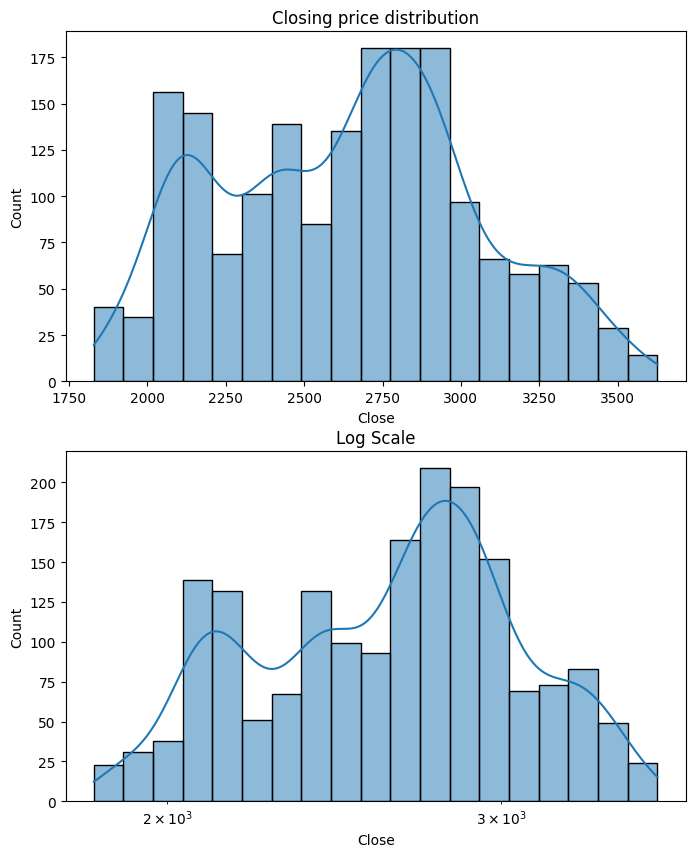

In [ ]:
fig, axs = plt.subplots(2, figsize=(8,10))
sns.histplot(data=yahoo_df, x='Close', ax=axs[0], kde=True)
axs[0].set_title('Closing price distribution')
sns.histplot(data=yahoo_df, x='Close', ax=axs[1], log_scale=True, kde=True)
axs[1].set_title('Log Scale')
plt.show()

There isn't much noticable differences between distribution of closing stock prices and their log transformations

<Figure size 800x600 with 0 Axes>

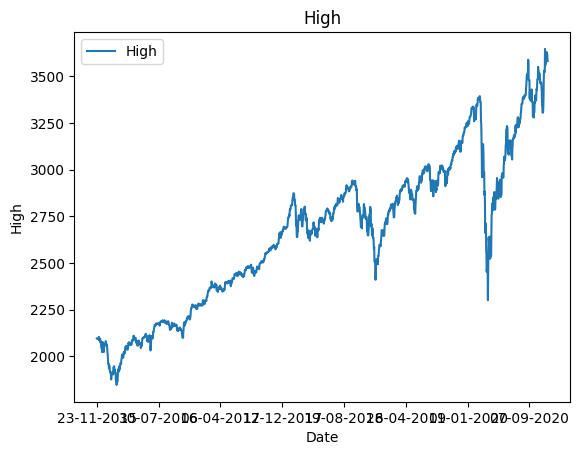

<Figure size 800x600 with 0 Axes>

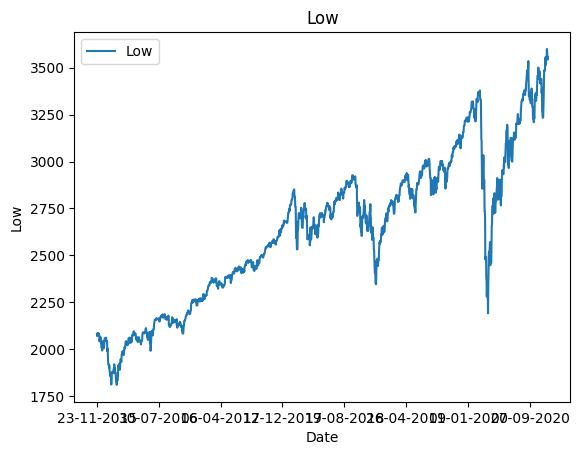

<Figure size 800x600 with 0 Axes>

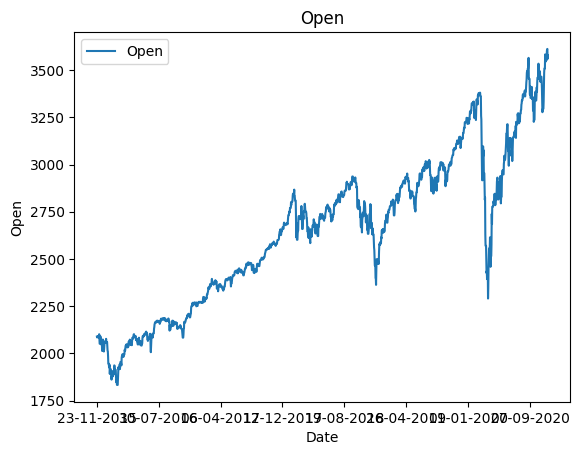

<Figure size 800x600 with 0 Axes>

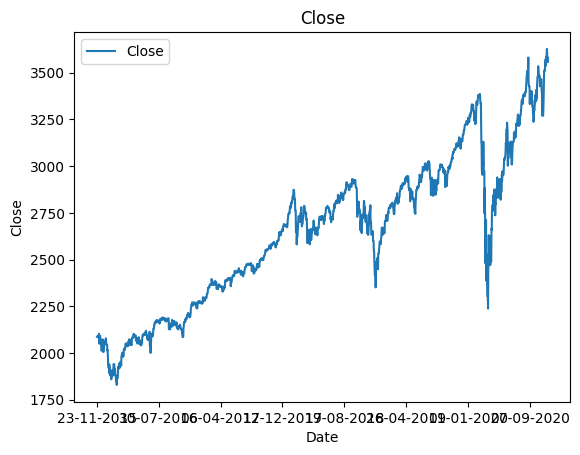

<Figure size 800x600 with 0 Axes>

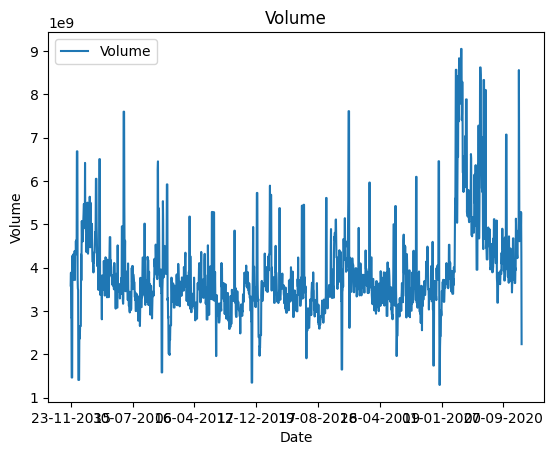

<Figure size 800x600 with 0 Axes>

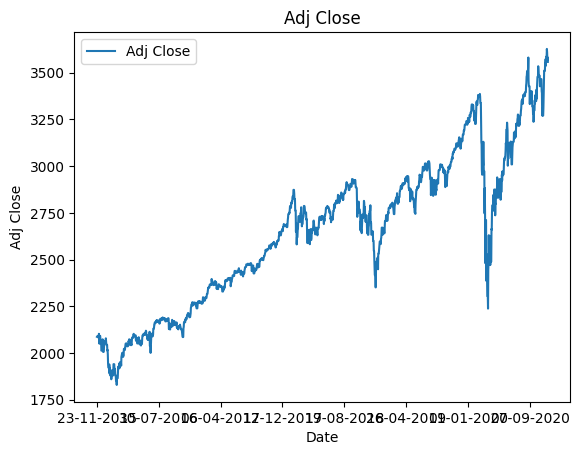

In [ ]:
for column in yahoo_df.columns:
    if column != 'Date':
        plt.figure(figsize=(8, 6))
        yahoo_df.plot(x='Date', y=column)
        plt.title(column)
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.show()

The time series is following an uptrend

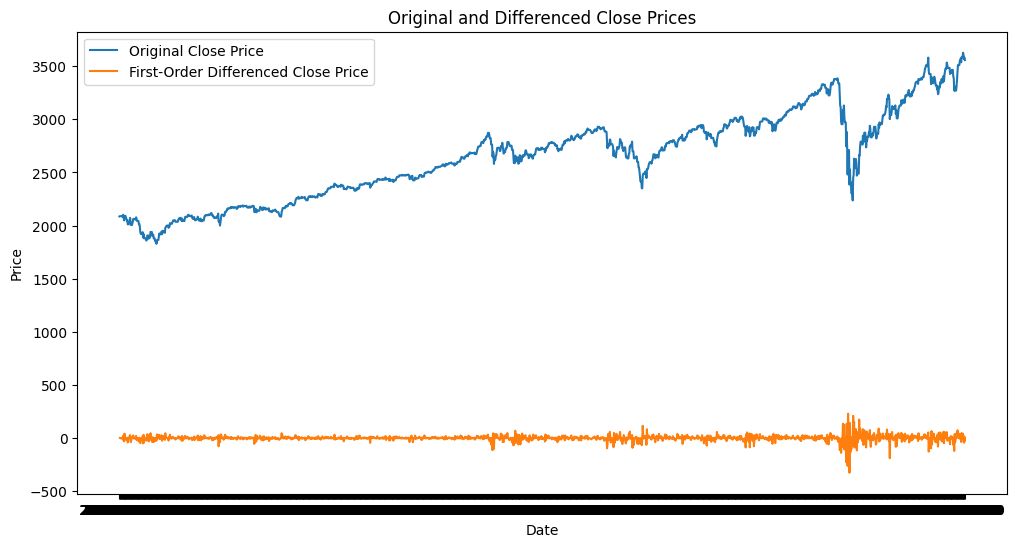

In [ ]:
# Apply first-order differencing to the 'Close' column
yahoo_df['Close_diff'] = yahoo_df['Close'].diff()

# Plot the original and differenced 'Close' price
plt.figure(figsize=(12, 6))
plt.plot(yahoo_df['Date'], yahoo_df['Close'], label='Original Close Price')
plt.plot(yahoo_df['Date'], yahoo_df['Close_diff'], label='First-Order Differenced Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original and Differenced Close Prices')
plt.legend()
plt.show()

<Figure size 1600x800 with 0 Axes>

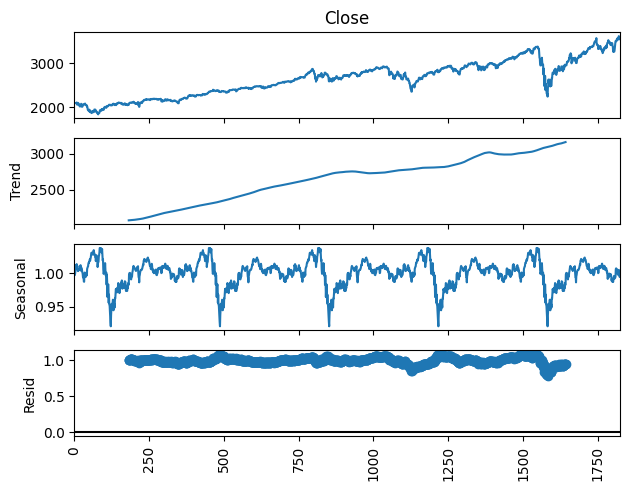

In [ ]:
#Applying seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(16, 8))

result = seasonal_decompose(yahoo_df['Close'], model='multiplicative', period=365)
result.plot()
plt.xticks(rotation=90)
plt.show()

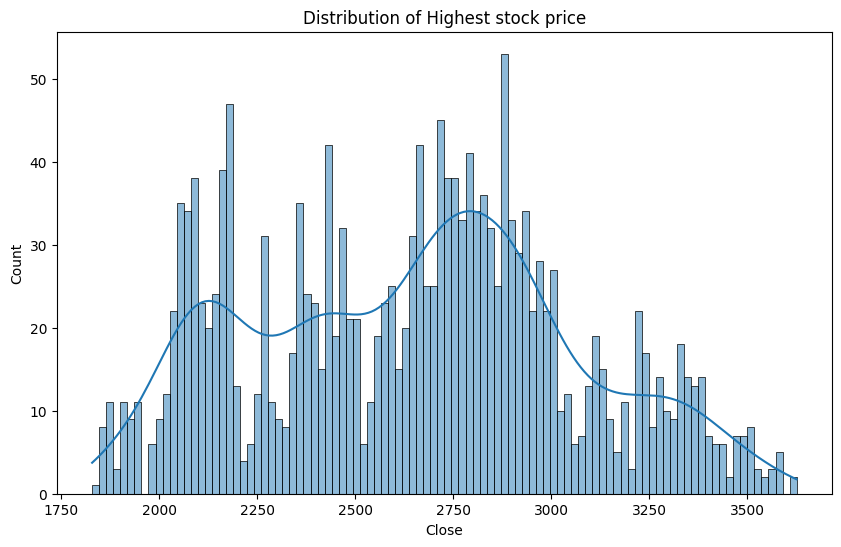

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(yahoo_df['Close'].dropna(), bins=100, kde=True)
plt.title('Distribution of Highest stock price')
plt.show()

<ipython-input-12-62583cf59b75>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  yahoo_df['Date'] = pd.to_datetime(yahoo_df['Date'])


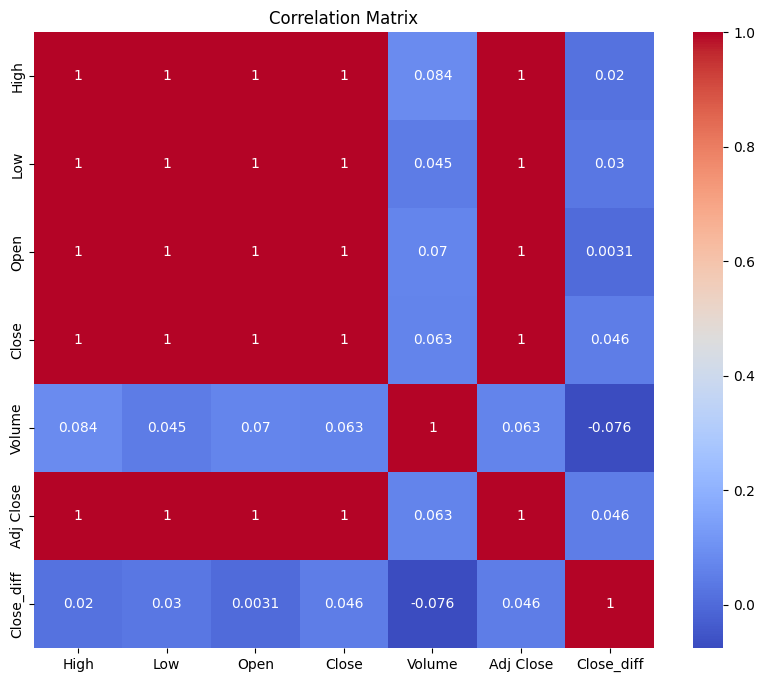

In [ ]:
#Correlation Analysis
# Convert 'Date' column to datetime objects for proper handling in calculations
yahoo_df['Date'] = pd.to_datetime(yahoo_df['Date'])

# Select only numerical features for correlation analysis
numerical_features = yahoo_df.select_dtypes(include=['number'])

corr_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Stationarity
import statsmodels.tsa.stattools as tsastattools
result = tsastattools.adfuller(yahoo_df['Close'])

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, ':', value)

if result[1] < 0.05:
    print('Reject the null hypothesis. The series is likely to be stationary.')
else:
    print('Fail to reject the null hypothesis. The series is likely to be non-stationary.')

ADF Statistic: -0.8703973868154902
p-value: 0.7975646341297054
Critical Values:
1% : -3.4339861159726306
5% : -2.863146142843122
10% : -2.5676250581282964
Fail to reject the null hypothesis. The series is likely to be non-stationary.


<Figure size 800x600 with 0 Axes>

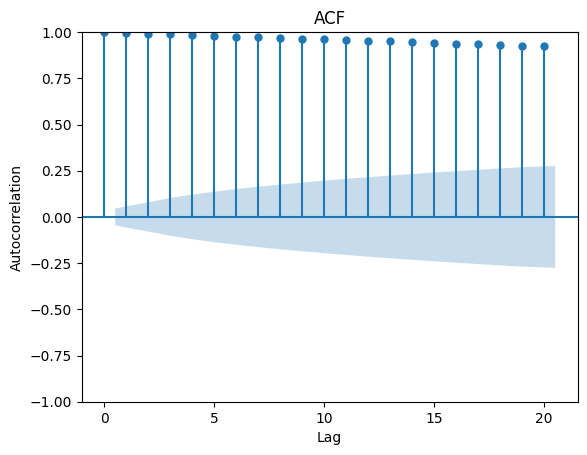

In [ ]:
#ACF
import statsmodels.api as sm
plt.figure(figsize=(8, 6))
sm.graphics.tsa.plot_acf(yahoo_df['Close'], lags=20)
plt.title('ACF')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 800x600 with 0 Axes>

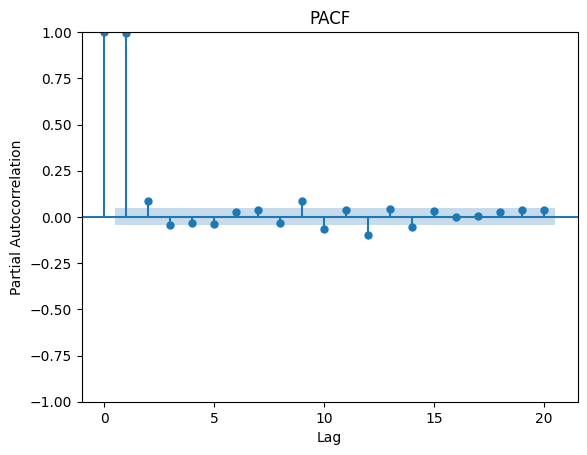

In [ ]:
#PACF
plt.figure(figsize=(8, 6))
sm.graphics.tsa.plot_pacf(yahoo_df['Close'], lags=20)
plt.title('PACF')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1825
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8595.892
Date:                Sun, 20 Apr 2025   AIC                          17197.784
Time:                        17:05:03   BIC                          17214.310
Sample:                             0   HQIC                         17203.880
                               - 1825                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4444      0.033    -13.400      0.000      -0.509      -0.379
ma.L1          0.2759      0.036      7.707      0.000       0.206       0.346
sigma2       725.8924      6.074    119.514      0.0

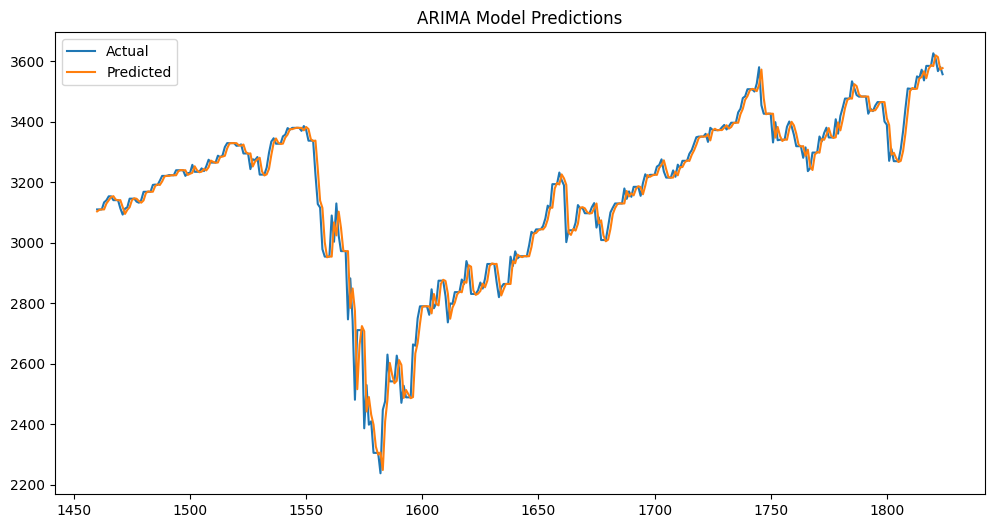

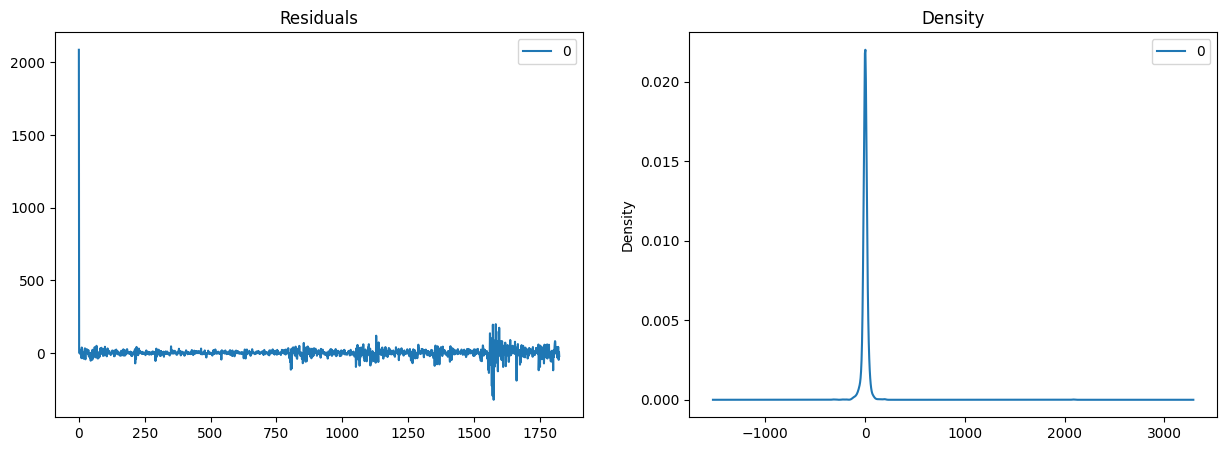

In [ ]:
# ARIMA Model with specified (p, d, q) order
from statsmodels.tsa.arima.model import ARIMA # Import the ARIMA class
p = 1
d = 1
q = 1

model = ARIMA(yahoo_df['Close'], order=(p, d, q))

# Fit the model
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Make predictions
predictions = model_fit.predict(start=len(yahoo_df) - 365, end=len(yahoo_df) - 1) # Example: predict the last 365 days

# Plot the predictions against actual values
plt.figure(figsize=(12, 6))
plt.plot(yahoo_df['Close'][-365:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('ARIMA Model Predictions')
plt.show()


# Plot residuals
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(15,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1825
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -8568.730
Date:                            Sun, 20 Apr 2025   AIC                          17147.461
Time:                                    17:05:10   BIC                          17174.972
Sample:                                         0   HQIC                         17157.613
                                           - 1825                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4300      0.037    -11.559      0.000      -0.503      -0.357
ma.L1          0.2724      0.040   

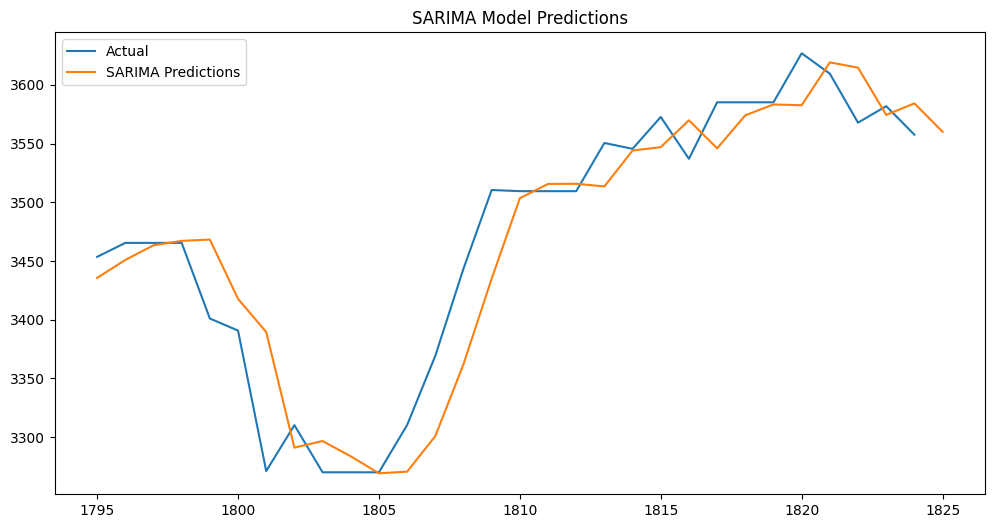

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define the (p, d, q) and (P, D, Q, s) orders for the SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # s=12 for monthly data

# Create and fit the SARIMA model
model = SARIMAX(yahoo_df['Close'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Print the model summary
print(model_fit.summary())

# Make predictions
predictions = model_fit.predict(start=len(yahoo_df['Close']) - 30, end=len(yahoo_df['Close'])) #Example prediction

#Plot the predictions against actual values
plt.figure(figsize=(12,6))
plt.plot(yahoo_df['Close'][-30:], label='Actual')
plt.plot(predictions, label='SARIMA Predictions')
plt.legend()
plt.title('SARIMA Model Predictions')
plt.show()

Exponential Smoothing MSE: 429627.59
Exponential Smoothing MAE: 648.81
Exponential Smoothing RMSE: 655.46


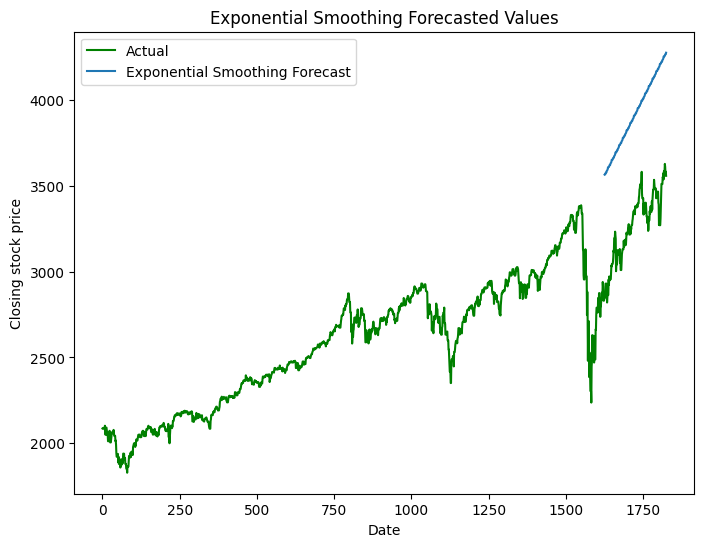

In [ ]:
# Applying time series models

import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Define forecast_steps: how many steps into the future to forecast
forecast_steps = 200

# Fit Exponential Smoothing model
hw_model = ExponentialSmoothing(yahoo_df['Close'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()


# Forecast using Exponential Smoothing
hw_forecast = hw_fit.forecast(steps=forecast_steps)

# Evaluate Exponential Smoothing
hw_forecast = hw_forecast
actual_values_for_comparison = yahoo_df['Close'][-forecast_steps:] # Get the last 'forecast_steps' values for comparison

hw_mse = mean_squared_error(actual_values_for_comparison, hw_forecast) # Compare with corresponding actual values
hw_mae = mean_absolute_error(actual_values_for_comparison, hw_forecast)
hw_rmse = hw_mse ** 0.5
print(f'Exponential Smoothing MSE: {hw_mse:.2f}')
print(f'Exponential Smoothing MAE: {hw_mae:.2f}')
print(f'Exponential Smoothing RMSE: {hw_rmse:.2f}')


#Plot Exponential Smoothing Forecast
plt.figure(figsize=(8, 6))
plt.plot(yahoo_df['Close'], label='Actual', color='green')

# For plotting, you might want to shift the forecast to align with the actual data
plt.plot(yahoo_df.index[-forecast_steps:], hw_forecast, label='Exponential Smoothing Forecast') # Shift for plotting
plt.title('Exponential Smoothing Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Closing stock price')
plt.legend()
plt.show()

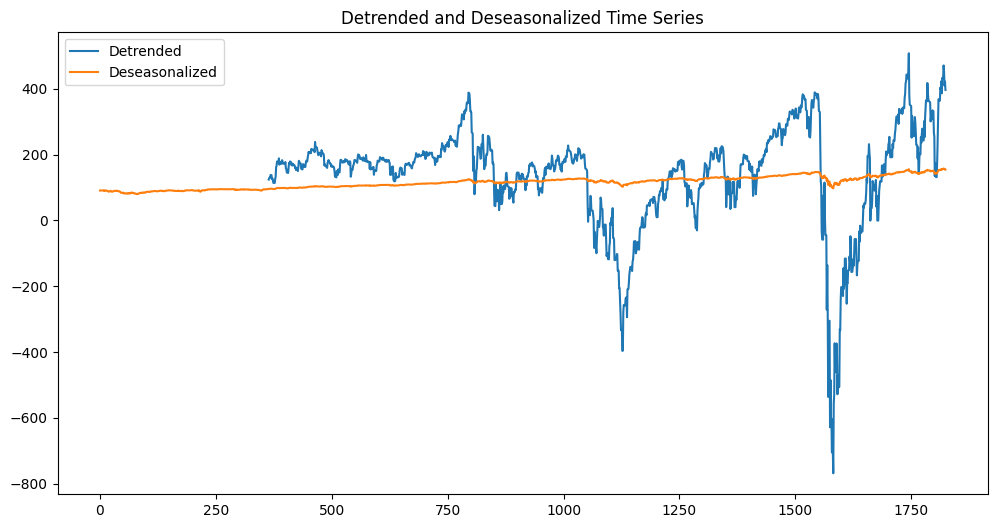

In [ ]:
# Detrending
# Using a rolling mean to detrend the data
yahoo_df['Close_Rolling_Mean'] = yahoo_df['Close'].rolling(window=365).mean()
yahoo_df['Close_Detrended'] = yahoo_df['Close'] - yahoo_df['Close_Rolling_Mean']

# Deseasonalizing
yahoo_df['Close_Seasonal'] = result[2]

yahoo_df['Close_Deseasonalized'] = yahoo_df['Close'] / yahoo_df['Close_Seasonal']


# Plotting detrended and deseasonalized data
plt.figure(figsize=(12, 6))
plt.plot(yahoo_df['Close_Detrended'], label='Detrended')
plt.plot(yahoo_df['Close_Deseasonalized'], label='Deseasonalized')
plt.legend()
plt.title("Detrended and Deseasonalized Time Series")
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import statsmodels.tsa.stattools as tsastattools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# AIC and BIC for ARIMA Model
# Trying different (p, d, q) orders and comparing their AIC/BIC values
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

best_aic = float('inf')
best_bic = float('inf')
best_order = None


for p in p_values:
    for d in d_values:
      for q in q_values:
        try:
          model = ARIMA(yahoo_df['Close'], order=(p,d,q))
          model_fit = model.fit()
          aic = model_fit.aic
          bic = model_fit.bic

          print(f"ARIMA({p},{d},{q}): AIC={aic:.2f}, BIC={bic:.2f}")

          if aic < best_aic:
              best_aic = aic
              best_bic = bic
              best_order = (p,d,q)

        except Exception as e:
          print(f"Error fitting ARIMA({p},{d},{q}):",e)
          continue


print(f"\nBest ARIMA Order (based on AIC): {best_order}, AIC: {best_aic:.2f}, BIC: {best_bic:.2f}")

# Now you can refit the ARIMA model using the best_order:
best_arima_model = ARIMA(yahoo_df['Close'], order=best_order)
best_arima_fit = best_arima_model.fit()
print(best_arima_fit.summary())

ARIMA(0,0,0): AIC=27116.99, BIC=27128.01
ARIMA(0,0,1): AIC=24739.26, BIC=24755.79
ARIMA(0,0,2): AIC=22964.76, BIC=22986.80
ARIMA(0,1,0): AIC=17257.16, BIC=17262.67
ARIMA(0,1,1): AIC=17210.90, BIC=17221.92
ARIMA(0,1,2): AIC=17192.06, BIC=17208.59
ARIMA(1,0,0): AIC=17275.86, BIC=17292.39
ARIMA(1,0,1): AIC=17230.10, BIC=17252.14
ARIMA(1,0,2): AIC=17211.03, BIC=17238.58
ARIMA(1,1,0): AIC=17202.19, BIC=17213.21
ARIMA(1,1,1): AIC=17197.78, BIC=17214.31
ARIMA(1,1,2): AIC=17190.47, BIC=17212.50
ARIMA(2,0,0): AIC=17221.39, BIC=17243.43
ARIMA(2,0,1): AIC=17217.03, BIC=17244.58
ARIMA(2,0,2): AIC=17209.26, BIC=17242.32
ARIMA(2,1,0): AIC=17195.14, BIC=17211.67
ARIMA(2,1,1): AIC=17193.04, BIC=17215.07
ARIMA(2,1,2): AIC=17191.70, BIC=17219.25

Best ARIMA Order (based on AIC): (1, 1, 2), AIC: 17190.47, BIC: 17212.50
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1825
Model:                 ARIMA(1

<Figure size 800x600 with 0 Axes>

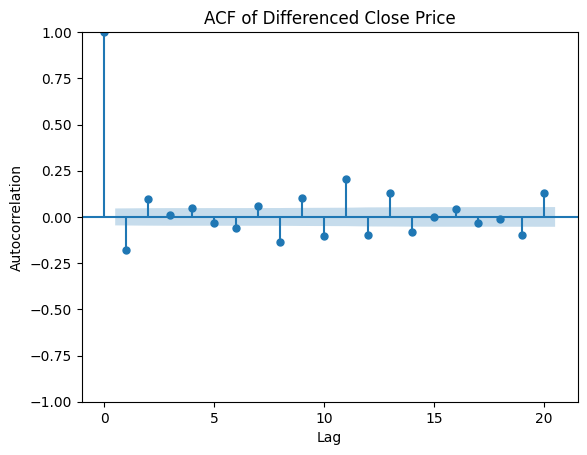

<Figure size 800x600 with 0 Axes>

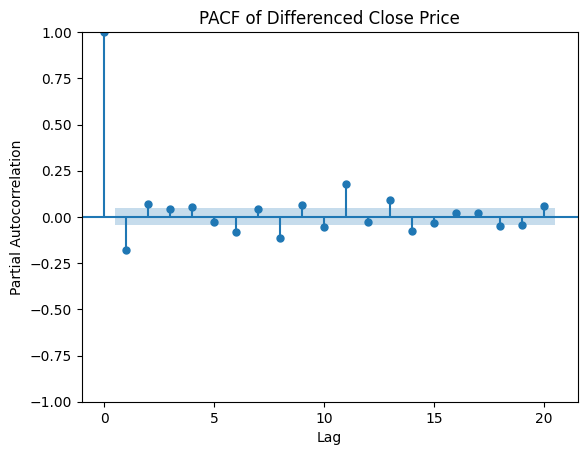

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# ACF and PACF of the differenced 'Close' price
plt.figure(figsize=(8, 6))
sm.graphics.tsa.plot_acf(yahoo_df['Close_diff'].dropna(), lags=20)  # Use dropna() to handle NaN values
plt.title('ACF of Differenced Close Price')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(8, 6))
sm.graphics.tsa.plot_pacf(yahoo_df['Close_diff'].dropna(), lags=20)  # Use dropna() to handle NaN values
plt.title('PACF of Differenced Close Price')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


In [ ]:
import warnings
warnings.filterwarnings('ignore')
# AIC and BIC for SARIMA Model
# Trying different (p, d, q) and (P, D, Q, s) orders and comparing their AIC/BIC values

p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [12]

best_aic = float('inf')
best_bic = float('inf')
best_order = None
best_seasonal_order = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in s_values:
                            try:
                                order = (p, d, q)
                                seasonal_order = (P, D, Q, s)
                                model = SARIMAX(yahoo_df['Close'], order=order, seasonal_order=seasonal_order)
                                model_fit = model.fit(disp=False)
                                aic = model_fit.aic
                                bic = model_fit.bic

                                print(f"SARIMA({p},{d},{q})({P},{D},{Q},{s}): AIC={aic:.2f}, BIC={bic:.2f}")

                                if aic < best_aic:
                                    best_aic = aic
                                    best_bic = bic
                                    best_order = order
                                    best_seasonal_order = seasonal_order

                            except Exception as e:
                                print(f"Error fitting SARIMA({p},{d},{q})({P},{D},{Q},{s}):", e)
                                continue

print(f"\nBest SARIMA Order (based on AIC): {best_order}x{best_seasonal_order}, AIC: {best_aic:.2f}, BIC: {best_bic:.2f}")

# Now you can refit the SARIMA model using the best_order and best_seasonal_order:
best_sarima_model = SARIMAX(yahoo_df['Close'], order=best_order, seasonal_order=best_seasonal_order)
best_sarima_fit = best_sarima_model.fit(disp=False)
print(best_sarima_fit.summary())

SARIMA(0,0,0)(0,0,0,12): AIC=33991.28, BIC=33996.79
SARIMA(0,0,0)(0,0,1,12): AIC=31596.73, BIC=31607.75
SARIMA(0,0,0)(0,1,0,12): AIC=21350.93, BIC=21356.43
SARIMA(0,0,0)(0,1,1,12): AIC=21344.53, BIC=21355.54
SARIMA(0,0,0)(1,0,0,12): AIC=21578.11, BIC=21589.12
SARIMA(0,0,0)(1,0,1,12): AIC=21571.56, BIC=21588.09
SARIMA(0,0,0)(1,1,0,12): AIC=21345.83, BIC=21356.84
SARIMA(0,0,0)(1,1,1,12): AIC=21344.26, BIC=21360.77
SARIMA(0,0,1)(0,0,0,12): AIC=31560.11, BIC=31571.13
SARIMA(0,0,1)(0,0,1,12): AIC=29190.49, BIC=29207.01
SARIMA(0,0,1)(0,1,0,12): AIC=20124.17, BIC=20135.18
SARIMA(0,0,1)(0,1,1,12): AIC=20077.64, BIC=20094.14
SARIMA(0,0,1)(1,0,0,12): AIC=20745.56, BIC=20762.09
SARIMA(0,0,1)(1,0,1,12): AIC=31299.58, BIC=31321.61
SARIMA(0,0,1)(1,1,0,12): AIC=20078.87, BIC=20095.38
SARIMA(0,0,1)(1,1,1,12): AIC=20069.94, BIC=20091.95
SARIMA(0,1,0)(0,0,0,12): AIC=17257.16, BIC=17262.67
SARIMA(0,1,0)(0,0,1,12): AIC=17243.60, BIC=17254.62
SARIMA(0,1,0)(0,1,0,12): AIC=18569.03, BIC=18574.53
SARIMA(0,1,0